In [2]:
# Import Important Libraries & Dependencies
import sklearn
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.svm import SVC # importing support vector classifier
from sklearn import preprocessing # preprocessing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
import math
import matplotlib.pyplot as plt

import pandas as pd
import numpy.polynomial.polynomial as poly
%matplotlib inline

## Reading data from csv

link to dataset: 

In [3]:
#change filepath as needed, data is referenced above
df = pd.read_csv('../Access/ml_project-csgo/csgo_round_snapshots.csv',header = 0)
df = df.dropna()

In [4]:
#see contents of dataframe
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [5]:
#cExtract our weapons features
weapons_ct = df.loc[:, 'ct_weapon_ak47':'ct_weapon_tec9':2]
weapons_t = df.loc[:, 't_weapon_ak47':'t_weapon_tec9':2]
weapons_ct = weapons_ct.drop(["ct_weapon_elite"], axis = 1)
weapons_t = weapons_t.drop(["t_weapon_elite"], axis = 1)


#cCompile list of costs for each weapon
cost_list = np.array([2700,3300,4750,1400,500,2050,5000,1800,200,5200,2900,3100,1050,1300,1500,1500,1250,1700,1050,2350,600,1100,5000,3000,1700,1200,2000,700,500,200,300,200,500])
cost_list = np.transpose(cost_list)
#cCalculate total weapon costs for T and CT via dot product
total_cost_ct = np.dot(weapons_ct,cost_list)
total_cost_t = np.dot(weapons_t,cost_list)

#creplace all the weapon features with a total cost of the weapons used in the round as one feature
df_NW = df.drop(df.iloc[:, 16:84], axis = 1)
df_NW.insert(17,"Total Weapon Cost T", np.transpose(total_cost_t))
df_NW.insert(17,"Total Weapon Cost CT", np.transpose(total_cost_ct))

# replace round winner/bombplanted into numeric features
df_NW["round_winner"] = np.where(df_NW["round_winner"] ==  "CT", 1, 0)
df_NW["bomb_planted"] = np.where(df_NW["bomb_planted"] ==  "True", 1, 0)

In [6]:
#see contents of new dataframe (NO WEAPONS)
df_NW

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,0,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122406,174.93,11.0,15.0,de_train,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122407,114.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,0
122408,94.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0


In [7]:
#organize by map, see the keys
print(f"keys: {np.unique(df_NW['map'])}")

keys = np.unique(df_NW['map'])


#create a dictionary of all dataframes grouped by map
data_map = {}
for map in keys:
    if map != 'de_cache': #de_cache has limited data compared to the rest of the maps
        temp_df = df_NW.loc[df_NW['map'] == map]
#         data_map[map] = df_NW.loc[df_NW['map'] == map]
        data_map[map] = temp_df.drop(columns = ["map"])
    
print(data_map.keys())

keys: ['de_cache' 'de_dust2' 'de_inferno' 'de_mirage' 'de_nuke' 'de_overpass'
 'de_train' 'de_vertigo']
dict_keys(['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke', 'de_overpass', 'de_train', 'de_vertigo'])


In [8]:
# df_NW = df_NW.drop(["map","round_winner"], axis = 1)
df_NW

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,0,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122406,174.93,11.0,15.0,de_train,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122407,114.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,0
122408,94.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0


In [9]:
#intialize scalar object to scale data
scalar = preprocessing.StandardScaler()

### attempt to run svm on all maps in one go


In [10]:
#storing all results into a dictionary
results_dict = {}
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for map in data_map.keys():
    results_dict[map] = {}
    results_dict[map]["C_values"] = c_vals
    
results_dict

{'de_dust2': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
 'de_inferno': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
 'de_mirage': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
 'de_nuke': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
 'de_overpass': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
 'de_train': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
 'de_vertigo': {'C_values': [0.0001, 0.001, 0.01, 0.1, 1, 10]}}

## SVM with Linear Kernel


Here since we are just using SVC with no fields, we are using RBF kernel by default.
refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for more info

analyzing: de_dust2...
X_train shape: (14836, 29)
X_test shape: (7308, 29)
Y_train shape: (14836,)
Y_test shape: (7308,)
C = 0.0001:
resulting training accuracy: 0.5411836074413588
resulting test accuracy: 0.5414614121510674
C = 0.001:
resulting training accuracy: 0.5587085467781073
resulting test accuracy: 0.5597974822112753
C = 0.01:
resulting training accuracy: 0.7502696144513346
resulting test accuracy: 0.746031746031746
C = 0.1:
resulting training accuracy: 0.7617282286330548
resulting test accuracy: 0.7545155993431856
C = 1:
resulting training accuracy: 0.7985980048530601
resulting test accuracy: 0.7779146141215106
C = 10:
resulting training accuracy: 0.8633728767861958
resulting test accuracy: 0.7965243568691844
de_dust2 analysis complete


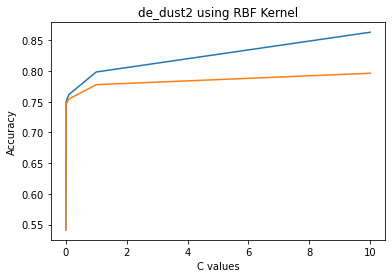

analyzing: de_inferno...
X_train shape: (15953, 29)
X_test shape: (7858, 29)
Y_train shape: (15953,)
Y_test shape: (7858,)
C = 0.0001:
resulting training accuracy: 0.5456653920892622
resulting test accuracy: 0.546703995927717
C = 0.001:
resulting training accuracy: 0.5877891305710524
resulting test accuracy: 0.5923899210995164
C = 0.01:
resulting training accuracy: 0.7465680436281578
resulting test accuracy: 0.740519216085518
C = 0.1:
resulting training accuracy: 0.7598570801730082
resulting test accuracy: 0.7523542886230593
C = 1:
resulting training accuracy: 0.7814204224910675
resulting test accuracy: 0.7625349961822346
C = 10:
resulting training accuracy: 0.840531561461794
resulting test accuracy: 0.7800967167218121
de_inferno analysis complete


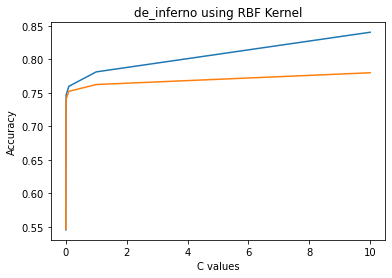

analyzing: de_mirage...
X_train shape: (12445, 29)
X_test shape: (6131, 29)
Y_train shape: (12445,)
Y_test shape: (6131,)
C = 0.0001:
resulting training accuracy: 0.5034953796705505
resulting test accuracy: 0.5163921056923829
C = 0.001:
resulting training accuracy: 0.6572117316191242
resulting test accuracy: 0.6617191322785843
C = 0.01:
resulting training accuracy: 0.7474487746082764
resulting test accuracy: 0.7370738868047627
C = 0.1:
resulting training accuracy: 0.7666532744073925
resulting test accuracy: 0.751590278910455
C = 1:
resulting training accuracy: 0.799517878666131
resulting test accuracy: 0.7731202087750775
C = 10:
resulting training accuracy: 0.8554439533949377
resulting test accuracy: 0.7897569727613766
de_mirage analysis complete


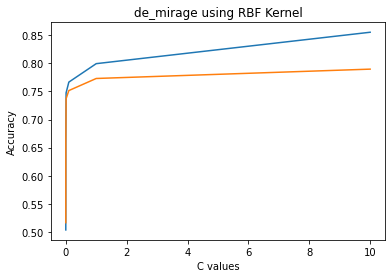

analyzing: de_nuke...
X_train shape: (12746, 29)
X_test shape: (6279, 29)
Y_train shape: (12746,)
Y_test shape: (6279,)
C = 0.0001:
resulting training accuracy: 0.5335791620900675
resulting test accuracy: 0.5435578913839784
C = 0.001:
resulting training accuracy: 0.5430723364192688
resulting test accuracy: 0.5507246376811594
C = 0.01:
resulting training accuracy: 0.7337203828652126
resulting test accuracy: 0.7378563465519987
C = 0.1:
resulting training accuracy: 0.7578848266122705
resulting test accuracy: 0.7534639273769709
C = 1:
resulting training accuracy: 0.796092891887651
resulting test accuracy: 0.777512342729734
C = 10:
resulting training accuracy: 0.8512474501804488
resulting test accuracy: 0.7861124382863514
de_nuke analysis complete


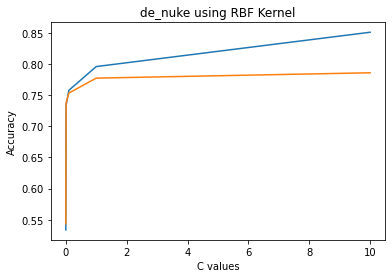

analyzing: de_overpass...
X_train shape: (9434, 29)
X_test shape: (4647, 29)
Y_train shape: (9434,)
Y_test shape: (4647,)
C = 0.0001:
resulting training accuracy: 0.5076319694721221
resulting test accuracy: 0.4876264256509576
C = 0.001:
resulting training accuracy: 0.5443078227687089
resulting test accuracy: 0.5274370561652679
C = 0.01:
resulting training accuracy: 0.7487810048759805
resulting test accuracy: 0.7579083279535184
C = 0.1:
resulting training accuracy: 0.7726309094763621
resulting test accuracy: 0.7706046911986227
C = 1:
resulting training accuracy: 0.8041127835488658
resulting test accuracy: 0.7807187432752314
C = 10:
resulting training accuracy: 0.8694085223659105
resulting test accuracy: 0.8046051215838175
de_overpass analysis complete


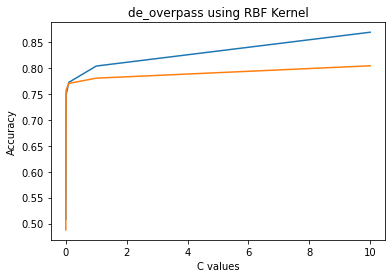

analyzing: de_train...
X_train shape: (9038, 29)
X_test shape: (4453, 29)
Y_train shape: (9038,)
Y_test shape: (4453,)
C = 0.0001:
resulting training accuracy: 0.5422659880504537
resulting test accuracy: 0.5409836065573771
C = 0.001:
resulting training accuracy: 0.5422659880504537
resulting test accuracy: 0.5409836065573771
C = 0.01:
resulting training accuracy: 0.7397654348307148
resulting test accuracy: 0.7273748035032562
C = 0.1:
resulting training accuracy: 0.7590174817437486
resulting test accuracy: 0.7471367617336627
C = 1:
resulting training accuracy: 0.793095817658774
resulting test accuracy: 0.7628565012351224
C = 10:
resulting training accuracy: 0.8736446116397433
resulting test accuracy: 0.7940714125308781
de_train analysis complete


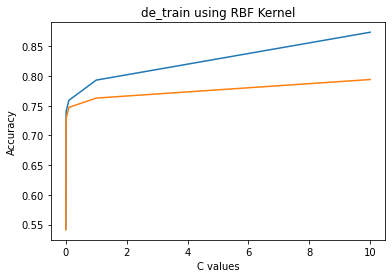

analyzing: de_vertigo...
X_train shape: (7461, 29)
X_test shape: (3676, 29)
Y_train shape: (7461,)
Y_test shape: (3676,)
C = 0.0001:
resulting training accuracy: 0.5341107090202386
resulting test accuracy: 0.5204026115342764
C = 0.001:
resulting training accuracy: 0.5341107090202386
resulting test accuracy: 0.5204026115342764
C = 0.01:
resulting training accuracy: 0.7580753250234553
resulting test accuracy: 0.7551686615886833
C = 0.1:
resulting training accuracy: 0.7777777777777778
resulting test accuracy: 0.7731229597388466
C = 1:
resulting training accuracy: 0.8194611982308002
resulting test accuracy: 0.7886289445048966
C = 10:
resulting training accuracy: 0.8855381316177456
resulting test accuracy: 0.8046789989118607
de_vertigo analysis complete


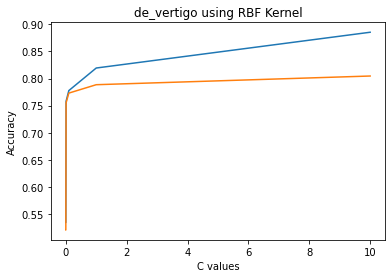

In [10]:
#iterate through all the maps in the data map
for map in data_map.keys():
    rbf_training_acc = []
    rbf_testing_acc = []
    
    #get the dataframe linked to the map
    print(f"analyzing: {map}...")
    #data_map[map] = data_map[map].drop(columns = ["map"])
    df_map = data_map[map]
    
    #extract features, and labels from dataframe
    X = scalar.fit_transform(np.array(df_map)[:, :-1])
    Y = np.array(df_map)[:, -1]
    
    #split into training and testing data
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"Y_test shape: {Y_test.shape}")
    
    #test on diferent values of C
    c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    
    for c in c_vals:
        print(f"C = {c}:")
        #initialize and train SVM model
        svm_model = SVC(probability = False, C=c)
        svm_model.fit(X_train, Y_train)

        #predict on training data
        yhat_train = svm_model.predict(X_train)
        #predict on testing data
        yhat_test = svm_model.predict(X_test)

        #accuracy
        acc_train = np.mean(yhat_train == Y_train)
        print(f"resulting training accuracy: {acc_train}")
        acc_test = np.mean(yhat_test == Y_test)
        print(f"resulting test accuracy: {acc_test}")
        rbf_training_acc.append(acc_train)
        rbf_testing_acc.append(acc_test)
    
    results_dict[map]["Training accuracy using RBF Kernel"] = rbf_training_acc
    results_dict[map]["Testing accuracy using RBF Kernel"] = rbf_testing_acc
    
    print(f"{map} analysis complete")
    plt.plot(c_vals, rbf_training_acc)
    plt.plot(c_vals, rbf_testing_acc)
    plt.title(f"{map} using RBF Kernel")
    plt.xlabel("C values")
    plt.ylabel("Accuracy")
#     plt.savefig(f"{map}_rbf.png")
    plt.show()
    


## SVM with Linear Kernel

In [ ]:
#iterate through all the maps in the data map
for map in data_map.keys():
    linear_training_acc = []
    linear_testing_acc = []
    
    #get the dataframe linked to the map
    print(f"analyzing: {map}...")
    #data_map[map] = data_map[map].drop(columns = ["map"])
    df_map = data_map[map]
    
    #extract features, and labels from dataframe
    X = scalar.fit_transform(np.array(df_map)[:, :-1])
    Y = np.array(df_map)[:, -1]
    
    #split into training and testing data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"Y_test shape: {Y_test.shape}")
    
    #test on diferent values of C
    c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    
    for c in c_vals:
        print(f"C = {c}:")
        #initialize and train SVM model
        svm_model = SVC(probability = False, kernel='linear' , C=c)
        svm_model.fit(X_train, Y_train)

        #predict on training data
        yhat_train = svm_model.predict(X_train)
        #predict on testing data
        yhat_test = svm_model.predict(X_test)

        #accuracy
        acc_train = np.mean(yhat_train == Y_train)
        print(f"resulting training accuracy: {acc_train}")
        acc_test = np.mean(yhat_test == Y_test)
        print(f"resulting test accuracy: {acc_test}")
        linear_training_acc.append(acc_train)
        linear_testing_acc.append(acc_test)
        
    results_dict[map]["Training accuracy using Linear Kernel"] = linear_training_acc
    results_dict[map]["Testing accuracy using Linear Kernel"] = linear_testing_acc
    
    print(f"{map} analysis complete")
    plt.plot(c_vals, linear_training_acc)
    plt.plot(c_vals, linear_testing_acc)
    plt.title(f"{map} using Linear Kernel")
    plt.xlabel("C values")
    plt.ylabel("Accuracy")
#     plt.savefig(f"{map}_linear.png")
    plt.show()

## SVM with Polynomial Kernel

testing degree 4 polynomial kernel
analyzing: de_dust2...
X_train shape: (14836, 29)
X_test shape: (7308, 29)
Y_train shape: (14836,)
Y_test shape: (7308,)
C = 0.0001:
resulting training accuracy: 0.5411836074413588
resulting test accuracy: 0.5414614121510674
C = 0.001:
resulting training accuracy: 0.5556753842005931
resulting test accuracy: 0.5537766830870279
C = 0.01:
resulting training accuracy: 0.6465354543003505
resulting test accuracy: 0.6409414340448824
C = 0.1:
resulting training accuracy: 0.7405634942032893
resulting test accuracy: 0.7272851669403394
C = 1:
resulting training accuracy: 0.8031814505257482
resulting test accuracy: 0.7649151614668857
C = 10:
resulting training accuracy: 0.8713939067133999
resulting test accuracy: 0.7961138478379858
de_dust2 analysis complete


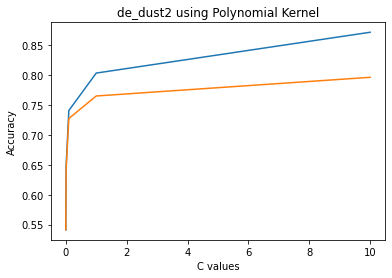

testing degree 5 polynomial kernel
analyzing: de_dust2...
X_train shape: (14836, 29)
X_test shape: (7308, 29)
Y_train shape: (14836,)
Y_test shape: (7308,)
C = 0.0001:
resulting training accuracy: 0.5422620652466972
resulting test accuracy: 0.5424192665571976
C = 0.001:
resulting training accuracy: 0.5636290105149636
resulting test accuracy: 0.5621237000547346
C = 0.01:
resulting training accuracy: 0.6546238878403883
resulting test accuracy: 0.6423097974822113
C = 0.1:
resulting training accuracy: 0.7450121326503101
resulting test accuracy: 0.7282430213464697
C = 1:
resulting training accuracy: 0.8042599083310865
resulting test accuracy: 0.7597153804050356
C = 10:
resulting training accuracy: 0.8837287678619574
resulting test accuracy: 0.7922824302134647
de_dust2 analysis complete


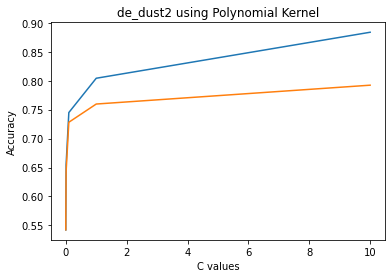

testing degree 6 polynomial kernel
analyzing: de_dust2...
X_train shape: (14836, 29)
X_test shape: (7308, 29)
Y_train shape: (14836,)
Y_test shape: (7308,)
C = 0.0001:
resulting training accuracy: 0.5439471555675384
resulting test accuracy: 0.5433771209633279
C = 0.001:
resulting training accuracy: 0.5647748719331356
resulting test accuracy: 0.562807881773399
C = 0.01:
resulting training accuracy: 0.6288757077379348
resulting test accuracy: 0.6161740558292282
C = 0.1:
resulting training accuracy: 0.7244540307360474
resulting test accuracy: 0.694991789819376
C = 1:
resulting training accuracy: 0.7969803181450525
resulting test accuracy: 0.743431855500821
C = 10:
resulting training accuracy: 0.8784038824480992
resulting test accuracy: 0.7796934865900383
de_dust2 analysis complete


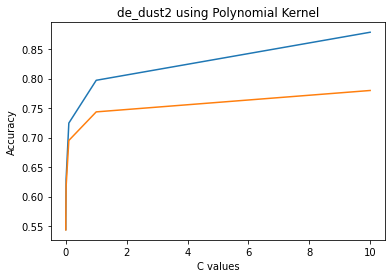

testing degree 7 polynomial kernel
analyzing: de_dust2...
X_train shape: (14836, 29)
X_test shape: (7308, 29)
Y_train shape: (14836,)
Y_test shape: (7308,)
C = 0.0001:
resulting training accuracy: 0.5464410892423834
resulting test accuracy: 0.5448823207443897
C = 0.001:
resulting training accuracy: 0.5703019681854947
resulting test accuracy: 0.5643130815544609
C = 0.01:
resulting training accuracy: 0.6340657859261256
resulting test accuracy: 0.6135741652983032
C = 0.1:
resulting training accuracy: 0.7243866271232138
resulting test accuracy: 0.6938970990695129
C = 1:
resulting training accuracy: 0.7975869506605554
resulting test accuracy: 0.738232074438971
C = 10:
resulting training accuracy: 0.8736182259369102
resulting test accuracy: 0.7698412698412699
de_dust2 analysis complete


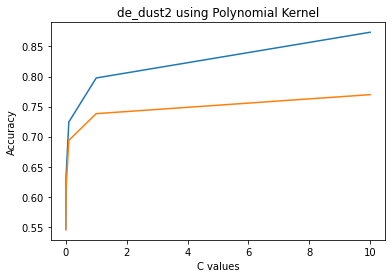

testing degree 4 polynomial kernel
analyzing: de_inferno...
X_train shape: (15953, 29)
X_test shape: (7858, 29)
Y_train shape: (15953,)
Y_test shape: (7858,)
C = 0.0001:
resulting training accuracy: 0.5467310223782361
resulting test accuracy: 0.5468312547722066
C = 0.001:
resulting training accuracy: 0.5563843791136464
resulting test accuracy: 0.5540850089081191
C = 0.01:
resulting training accuracy: 0.6563655738732527
resulting test accuracy: 0.6505472130313057
C = 0.1:
resulting training accuracy: 0.7329029022754341
resulting test accuracy: 0.7219394247900229
C = 1:
resulting training accuracy: 0.7876888359556197
resulting test accuracy: 0.7527360651565284
C = 10:
resulting training accuracy: 0.852316178775152
resulting test accuracy: 0.7797149401883431
de_inferno analysis complete


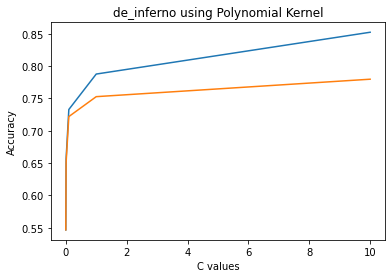

testing degree 5 polynomial kernel
analyzing: de_inferno...
X_train shape: (15953, 29)
X_test shape: (7858, 29)
Y_train shape: (15953,)
Y_test shape: (7858,)
C = 0.0001:
resulting training accuracy: 0.5475459161286278
resulting test accuracy: 0.5468312547722066
C = 0.001:
resulting training accuracy: 0.5750015671033661
resulting test accuracy: 0.572283023670145
C = 0.01:
resulting training accuracy: 0.6606280950291481
resulting test accuracy: 0.6525833545431408
C = 0.1:
resulting training accuracy: 0.7390459474706952
resulting test accuracy: 0.720666836345126
C = 1:
resulting training accuracy: 0.7895693599949852
resulting test accuracy: 0.747518452532451
C = 10:
resulting training accuracy: 0.8652917946467749
resulting test accuracy: 0.7767879867650802
de_inferno analysis complete


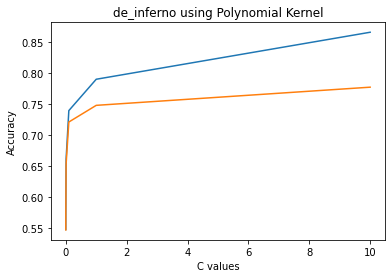

testing degree 6 polynomial kernel
analyzing: de_inferno...
X_train shape: (15953, 29)
X_test shape: (7858, 29)
Y_train shape: (15953,)
Y_test shape: (7858,)
C = 0.0001:
resulting training accuracy: 0.5491130194947659
resulting test accuracy: 0.5472130313056758
C = 0.001:
resulting training accuracy: 0.5775716166238325
resulting test accuracy: 0.5745736828709596
C = 0.01:
resulting training accuracy: 0.6354917570362941
resulting test accuracy: 0.6261135148892848
C = 0.1:
resulting training accuracy: 0.7240644392904156
resulting test accuracy: 0.7000509035377959
C = 1:
resulting training accuracy: 0.7804174763367392
resulting test accuracy: 0.7340290150165436
C = 10:
resulting training accuracy: 0.8636620071459914
resulting test accuracy: 0.7635530669381522
de_inferno analysis complete


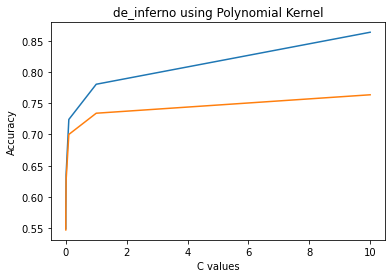

testing degree 7 polynomial kernel
analyzing: de_inferno...
X_train shape: (15953, 29)
X_test shape: (7858, 29)
Y_train shape: (15953,)
Y_test shape: (7858,)
C = 0.0001:
resulting training accuracy: 0.5516830690152322
resulting test accuracy: 0.5486128785950624
C = 0.001:
resulting training accuracy: 0.5850310286466496
resulting test accuracy: 0.5795367778060575
C = 0.01:
resulting training accuracy: 0.6378737541528239
resulting test accuracy: 0.6226775260880631
C = 0.1:
resulting training accuracy: 0.726759857080173
resulting test accuracy: 0.6980147620259608
C = 1:
resulting training accuracy: 0.7796025825863474
resulting test accuracy: 0.7311020615932807
C = 10:
resulting training accuracy: 0.8597755907979691
resulting test accuracy: 0.760753372359379
de_inferno analysis complete


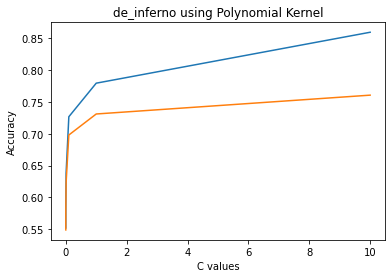

testing degree 4 polynomial kernel
analyzing: de_mirage...
X_train shape: (12445, 29)
X_test shape: (6131, 29)
Y_train shape: (12445,)
Y_test shape: (6131,)
C = 0.0001:
resulting training accuracy: 0.5037364403374849
resulting test accuracy: 0.5165552112216604
C = 0.001:
resulting training accuracy: 0.5229409401366011
resulting test accuracy: 0.5313978143859077
C = 0.01:
resulting training accuracy: 0.7187625552430695
resulting test accuracy: 0.703637253302887
C = 0.1:
resulting training accuracy: 0.7616713539574126
resulting test accuracy: 0.7378894144511499
C = 1:
resulting training accuracy: 0.8174367215749296
resulting test accuracy: 0.7768716359484586
C = 10:
resulting training accuracy: 0.8783447167537164
resulting test accuracy: 0.7941608220518676
de_mirage analysis complete


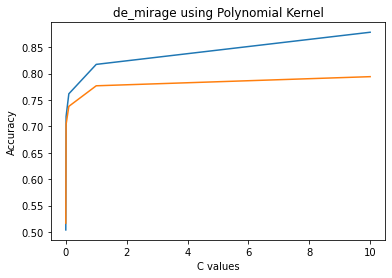

testing degree 5 polynomial kernel
analyzing: de_mirage...
X_train shape: (12445, 29)
X_test shape: (6131, 29)
Y_train shape: (12445,)
Y_test shape: (6131,)
C = 0.0001:
resulting training accuracy: 0.5044596223382884
resulting test accuracy: 0.5172076333387702
C = 0.001:
resulting training accuracy: 0.5610285255122539
resulting test accuracy: 0.5645082368292285
C = 0.01:
resulting training accuracy: 0.731378063479309
resulting test accuracy: 0.717664328820747
C = 0.1:
resulting training accuracy: 0.7742065086380072
resulting test accuracy: 0.7465340075028544
C = 1:
resulting training accuracy: 0.8187223784652471
resulting test accuracy: 0.7638231936062633
C = 10:
resulting training accuracy: 0.8947368421052632
resulting test accuracy: 0.7939977165225901
de_mirage analysis complete


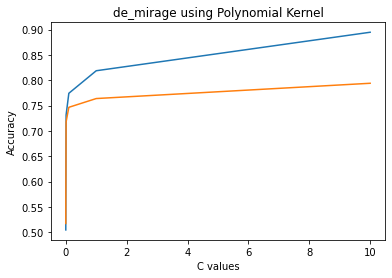

testing degree 6 polynomial kernel
analyzing: de_mirage...
X_train shape: (12445, 29)
X_test shape: (6131, 29)
Y_train shape: (12445,)
Y_test shape: (6131,)
C = 0.0001:
resulting training accuracy: 0.5063077541181197
resulting test accuracy: 0.5193280052193769
C = 0.001:
resulting training accuracy: 0.5608678184009642
resulting test accuracy: 0.5607568096558473
C = 0.01:
resulting training accuracy: 0.7079148252310165
resulting test accuracy: 0.6914043386070787
C = 0.1:
resulting training accuracy: 0.751145038167939
resulting test accuracy: 0.719132278584244
C = 1:
resulting training accuracy: 0.8065086380072318
resulting test accuracy: 0.74490295221008
C = 10:
resulting training accuracy: 0.8947368421052632
resulting test accuracy: 0.788778339585712
de_mirage analysis complete


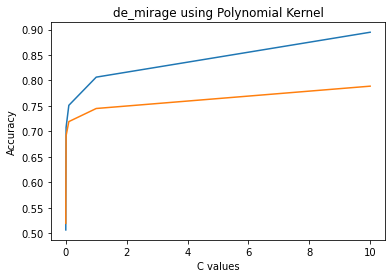

testing degree 7 polynomial kernel
analyzing: de_mirage...
X_train shape: (12445, 29)
X_test shape: (6131, 29)
Y_train shape: (12445,)
Y_test shape: (6131,)
C = 0.0001:
resulting training accuracy: 0.5077541181197268
resulting test accuracy: 0.5198173218072093
C = 0.001:
resulting training accuracy: 0.5656086781840096
resulting test accuracy: 0.561735442831512
C = 0.01:
resulting training accuracy: 0.687906789875452
resulting test accuracy: 0.6688957755667917
C = 0.1:
resulting training accuracy: 0.7553234230614705
resulting test accuracy: 0.717664328820747
C = 1:
resulting training accuracy: 0.8069907593411009
resulting test accuracy: 0.7395204697439243
C = 10:
resulting training accuracy: 0.8895138609883487
resulting test accuracy: 0.7776871635948459
de_mirage analysis complete


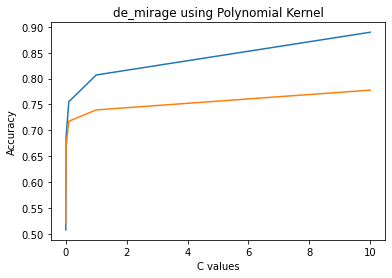

testing degree 4 polynomial kernel
analyzing: de_nuke...
X_train shape: (12746, 29)
X_test shape: (6279, 29)
Y_train shape: (12746,)
Y_test shape: (6279,)
C = 0.0001:
resulting training accuracy: 0.5337360740624509
resulting test accuracy: 0.5435578913839784
C = 0.001:
resulting training accuracy: 0.5384434332339557
resulting test accuracy: 0.547857939162287
C = 0.01:
resulting training accuracy: 0.6321983367330928
resulting test accuracy: 0.6381589425067686
C = 0.1:
resulting training accuracy: 0.7327789110309116
resulting test accuracy: 0.7190635451505016
C = 1:
resulting training accuracy: 0.8086458496783304
resulting test accuracy: 0.7689122471731168
C = 10:
resulting training accuracy: 0.8674878393221402
resulting test accuracy: 0.7928014014970537
de_nuke analysis complete


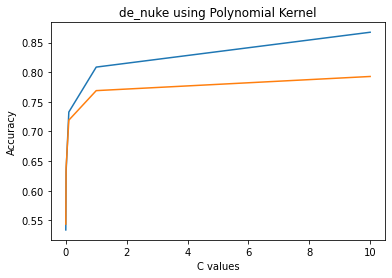

testing degree 5 polynomial kernel
analyzing: de_nuke...
X_train shape: (12746, 29)
X_test shape: (6279, 29)
Y_train shape: (12746,)
Y_test shape: (6279,)
C = 0.0001:
resulting training accuracy: 0.5342852659657932
resulting test accuracy: 0.5437171524128046
C = 0.001:
resulting training accuracy: 0.5433861603640358
resulting test accuracy: 0.5521579869405956
C = 0.01:
resulting training accuracy: 0.6434175427585125
resulting test accuracy: 0.6467590380633859
C = 0.1:
resulting training accuracy: 0.7434489251529892
resulting test accuracy: 0.7268673355629878
C = 1:
resulting training accuracy: 0.8175113761179978
resulting test accuracy: 0.7698678133460742
C = 10:
resulting training accuracy: 0.8814530048642711
resulting test accuracy: 0.7932791845835324
de_nuke analysis complete


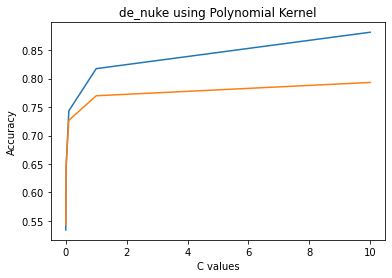

testing degree 6 polynomial kernel
analyzing: de_nuke...
X_train shape: (12746, 29)
X_test shape: (6279, 29)
Y_train shape: (12746,)
Y_test shape: (6279,)
C = 0.0001:
resulting training accuracy: 0.5352267378000941
resulting test accuracy: 0.544672718585762
C = 0.001:
resulting training accuracy: 0.5473874156598149
resulting test accuracy: 0.5545469023729893
C = 0.01:
resulting training accuracy: 0.6183900831633453
resulting test accuracy: 0.6145883102404841
C = 0.1:
resulting training accuracy: 0.7189706574611643
resulting test accuracy: 0.6913521261347348
C = 1:
resulting training accuracy: 0.7989173073905539
resulting test accuracy: 0.7474120082815735
C = 10:
resulting training accuracy: 0.885218892201475
resulting test accuracy: 0.781971651536869
de_nuke analysis complete


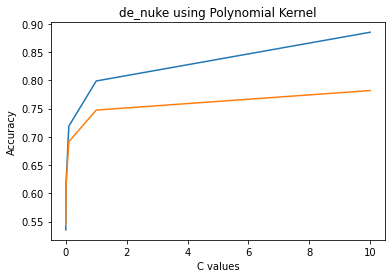

testing degree 7 polynomial kernel
analyzing: de_nuke...
X_train shape: (12746, 29)
X_test shape: (6279, 29)
Y_train shape: (12746,)
Y_test shape: (6279,)
C = 0.0001:
resulting training accuracy: 0.5397771849992155
resulting test accuracy: 0.5476986781334607
C = 0.001:
resulting training accuracy: 0.5537423505413464
resulting test accuracy: 0.5590062111801242
C = 0.01:
resulting training accuracy: 0.6224697944453161
resulting test accuracy: 0.6144290492116579
C = 0.1:
resulting training accuracy: 0.7181076416130551
resulting test accuracy: 0.6891224717311674
C = 1:
resulting training accuracy: 0.7992311313353209
resulting test accuracy: 0.7410415671285236
C = 10:
resulting training accuracy: 0.8825513886709556
resulting test accuracy: 0.7784679089026915
de_nuke analysis complete


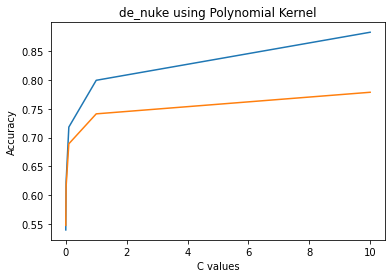

testing degree 4 polynomial kernel
analyzing: de_overpass...
X_train shape: (9434, 29)
X_test shape: (4647, 29)
Y_train shape: (9434,)
Y_test shape: (4647,)
C = 0.0001:
resulting training accuracy: 0.5076319694721221
resulting test accuracy: 0.4876264256509576
C = 0.001:
resulting training accuracy: 0.5137799448802205
resulting test accuracy: 0.4962341295459436
C = 0.01:
resulting training accuracy: 0.6723553105787576
resulting test accuracy: 0.6524639552399397
C = 0.1:
resulting training accuracy: 0.7524909900360398
resulting test accuracy: 0.7249838605551969
C = 1:
resulting training accuracy: 0.8206487174051303
resulting test accuracy: 0.7826554766516032
C = 10:
resulting training accuracy: 0.8822344710621157
resulting test accuracy: 0.7979341510652034
de_overpass analysis complete


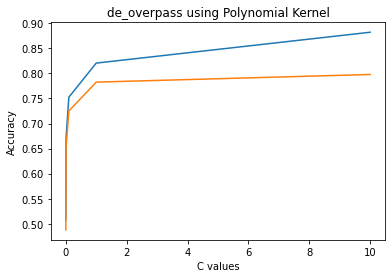

testing degree 5 polynomial kernel
analyzing: de_overpass...
X_train shape: (9434, 29)
X_test shape: (4647, 29)
Y_train shape: (9434,)
Y_test shape: (4647,)
C = 0.0001:
resulting training accuracy: 0.5086919652321391
resulting test accuracy: 0.48913277383258014
C = 0.001:
resulting training accuracy: 0.53625185499258
resulting test accuracy: 0.5162470411017861
C = 0.01:
resulting training accuracy: 0.6773372906508374
resulting test accuracy: 0.6511727996556919
C = 0.1:
resulting training accuracy: 0.7631969472122111
resulting test accuracy: 0.727996556918442
C = 1:
resulting training accuracy: 0.8240407038371846
resulting test accuracy: 0.7663008392511298
C = 10:
resulting training accuracy: 0.8970744117023531
resulting test accuracy: 0.8007316548310738
de_overpass analysis complete


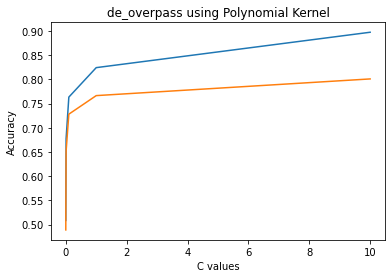

testing degree 6 polynomial kernel
analyzing: de_overpass...
X_train shape: (9434, 29)
X_test shape: (4647, 29)
Y_train shape: (9434,)
Y_test shape: (4647,)
C = 0.0001:
resulting training accuracy: 0.5102819588721645
resulting test accuracy: 0.4893479664299548
C = 0.001:
resulting training accuracy: 0.5385838456646174
resulting test accuracy: 0.5205508930492792
C = 0.01:
resulting training accuracy: 0.6248675005299978
resulting test accuracy: 0.5954379169356574
C = 0.1:
resulting training accuracy: 0.7348950604197583
resulting test accuracy: 0.6881859264041317
C = 1:
resulting training accuracy: 0.8033707865168539
resulting test accuracy: 0.7398321497740478
C = 10:
resulting training accuracy: 0.8952724189103244
resulting test accuracy: 0.7893264471702174
de_overpass analysis complete


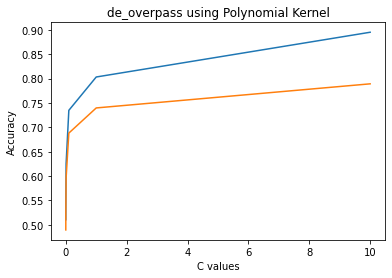

testing degree 7 polynomial kernel
analyzing: de_overpass...
X_train shape: (9434, 29)
X_test shape: (4647, 29)
Y_train shape: (9434,)
Y_test shape: (4647,)
C = 0.0001:
resulting training accuracy: 0.5129319482722069
resulting test accuracy: 0.4914998924037013
C = 0.001:
resulting training accuracy: 0.5513037947848208
resulting test accuracy: 0.5287282117495158
C = 0.01:
resulting training accuracy: 0.6263514945940216
resulting test accuracy: 0.592640413169787
C = 0.1:
resulting training accuracy: 0.7424210303158787
resulting test accuracy: 0.6853884226382613
C = 1:
resulting training accuracy: 0.7996608013567946
resulting test accuracy: 0.7208952012050786
C = 10:
resulting training accuracy: 0.8858384566461734
resulting test accuracy: 0.7744781579513664
de_overpass analysis complete


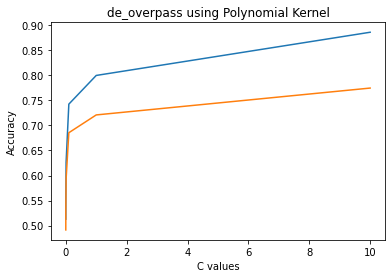

testing degree 4 polynomial kernel
analyzing: de_train...
X_train shape: (9038, 29)
X_test shape: (4453, 29)
Y_train shape: (9038,)
Y_test shape: (4453,)
C = 0.0001:
resulting training accuracy: 0.5427085638415579
resulting test accuracy: 0.5409836065573771
C = 0.001:
resulting training accuracy: 0.5442575791104226
resulting test accuracy: 0.5430047159218504
C = 0.01:
resulting training accuracy: 0.6159548572693073
resulting test accuracy: 0.6101504603637997
C = 0.1:
resulting training accuracy: 0.7340119495463598
resulting test accuracy: 0.7165955535593982
C = 1:
resulting training accuracy: 0.8112414250940474
resulting test accuracy: 0.7680215584998877
C = 10:
resulting training accuracy: 0.8857048019473335
resulting test accuracy: 0.7994610375028071
de_train analysis complete


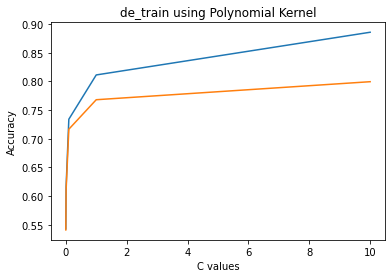

testing degree 5 polynomial kernel
analyzing: de_train...
X_train shape: (9038, 29)
X_test shape: (4453, 29)
Y_train shape: (9038,)
Y_test shape: (4453,)
C = 0.0001:
resulting training accuracy: 0.54292985173711
resulting test accuracy: 0.5409836065573771
C = 0.001:
resulting training accuracy: 0.5533303828280594
resulting test accuracy: 0.547945205479452
C = 0.01:
resulting training accuracy: 0.6235892896658553
resulting test accuracy: 0.6195823040646755
C = 0.1:
resulting training accuracy: 0.7387696393007303
resulting test accuracy: 0.7156972827307433
C = 1:
resulting training accuracy: 0.820203584863908
resulting test accuracy: 0.7691443970357063
C = 10:
resulting training accuracy: 0.8953308254038504
resulting test accuracy: 0.8037278239389176
de_train analysis complete


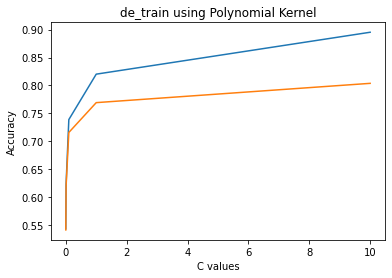

testing degree 6 polynomial kernel
analyzing: de_train...
X_train shape: (9038, 29)
X_test shape: (4453, 29)
Y_train shape: (9038,)
Y_test shape: (4453,)
C = 0.0001:
resulting training accuracy: 0.5435937154237663
resulting test accuracy: 0.5409836065573771
C = 0.001:
resulting training accuracy: 0.5565390573135649
resulting test accuracy: 0.5513137210869077
C = 0.01:
resulting training accuracy: 0.6116397433060412
resulting test accuracy: 0.6020660229059062
C = 0.1:
resulting training accuracy: 0.7157556981633104
resulting test accuracy: 0.6844823714349877
C = 1:
resulting training accuracy: 0.8031644169063952
resulting test accuracy: 0.7430945430047159
C = 10:
resulting training accuracy: 0.896437264881611
resulting test accuracy: 0.7889063552661127
de_train analysis complete


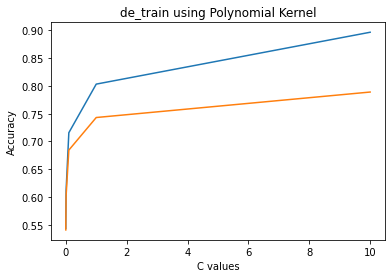

testing degree 7 polynomial kernel
analyzing: de_train...
X_train shape: (9038, 29)
X_test shape: (4453, 29)
Y_train shape: (9038,)
Y_test shape: (4453,)
C = 0.0001:
resulting training accuracy: 0.545032086744855
resulting test accuracy: 0.5423310128003593
C = 0.001:
resulting training accuracy: 0.5615180349634875
resulting test accuracy: 0.5540085335728723
C = 0.01:
resulting training accuracy: 0.6201593272847975
resulting test accuracy: 0.6034134291488884
C = 0.1:
resulting training accuracy: 0.7176366452755034
resulting test accuracy: 0.6777453402200764
C = 1:
resulting training accuracy: 0.8013941137419783
resulting test accuracy: 0.7390523242757692
C = 10:
resulting training accuracy: 0.8973224164638194
resulting test accuracy: 0.7875589490231305
de_train analysis complete


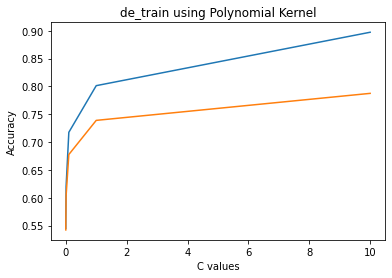

testing degree 4 polynomial kernel
analyzing: de_vertigo...
X_train shape: (7461, 29)
X_test shape: (3676, 29)
Y_train shape: (7461,)
Y_test shape: (3676,)
C = 0.0001:
resulting training accuracy: 0.5345127998927758
resulting test accuracy: 0.5206746463547334
C = 0.001:
resulting training accuracy: 0.5375954965822276
resulting test accuracy: 0.5225788900979326
C = 0.01:
resulting training accuracy: 0.6193539739981235
resulting test accuracy: 0.6036452665941241
C = 0.1:
resulting training accuracy: 0.730331054818389
resulting test accuracy: 0.720348204570185
C = 1:
resulting training accuracy: 0.8206674708484117
resulting test accuracy: 0.7704026115342764
C = 10:
resulting training accuracy: 0.9034981905910736
resulting test accuracy: 0.7957018498367792
de_vertigo analysis complete


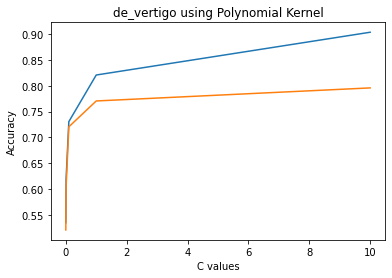

testing degree 5 polynomial kernel
analyzing: de_vertigo...
X_train shape: (7461, 29)
X_test shape: (3676, 29)
Y_train shape: (7461,)
Y_test shape: (3676,)
C = 0.0001:
resulting training accuracy: 0.536389223964616
resulting test accuracy: 0.5212187159956474
C = 0.001:
resulting training accuracy: 0.5401420721082965
resulting test accuracy: 0.5258433079434167
C = 0.01:
resulting training accuracy: 0.6386543358799088
resulting test accuracy: 0.6245919477693145
C = 0.1:
resulting training accuracy: 0.7454764776839565
resulting test accuracy: 0.7241566920565833
C = 1:
resulting training accuracy: 0.817048652995577
resulting test accuracy: 0.7671381936887922
C = 10:
resulting training accuracy: 0.9120761292052004
resulting test accuracy: 0.8005984766050055
de_vertigo analysis complete


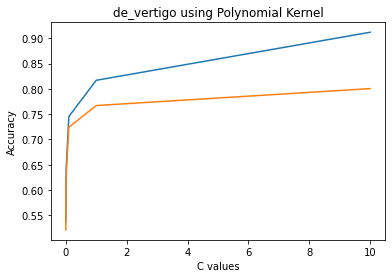

testing degree 6 polynomial kernel
analyzing: de_vertigo...
X_train shape: (7461, 29)
X_test shape: (3676, 29)
Y_train shape: (7461,)
Y_test shape: (3676,)
C = 0.0001:
resulting training accuracy: 0.5378635571639191
resulting test accuracy: 0.5217627856365615
C = 0.001:
resulting training accuracy: 0.5493901621766519
resulting test accuracy: 0.5345484221980413
C = 0.01:
resulting training accuracy: 0.6150650046910602
resulting test accuracy: 0.5889553862894451
C = 0.1:
resulting training accuracy: 0.7232274494035652
resulting test accuracy: 0.704842219804135
C = 1:
resulting training accuracy: 0.7962739579144886
resulting test accuracy: 0.7472796517954298
C = 10:
resulting training accuracy: 0.9020238573917705
resulting test accuracy: 0.7905331882480957
de_vertigo analysis complete


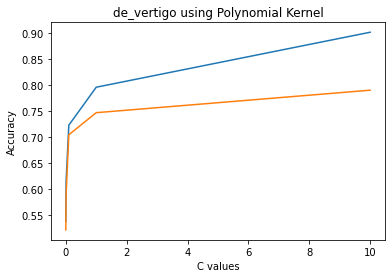

testing degree 7 polynomial kernel
analyzing: de_vertigo...
X_train shape: (7461, 29)
X_test shape: (3676, 29)
Y_train shape: (7461,)
Y_test shape: (3676,)
C = 0.0001:
resulting training accuracy: 0.5390698297815306
resulting test accuracy: 0.5239390642002176
C = 0.001:
resulting training accuracy: 0.5610507974802306
resulting test accuracy: 0.5386289445048966
C = 0.01:
resulting training accuracy: 0.6214984586516553
resulting test accuracy: 0.5933079434167573
C = 0.1:
resulting training accuracy: 0.7267122369655542
resulting test accuracy: 0.7029379760609358
C = 1:
resulting training accuracy: 0.794129473260957
resulting test accuracy: 0.7396626768226333
C = 10:
resulting training accuracy: 0.890363222088192
resulting test accuracy: 0.7831882480957563
de_vertigo analysis complete


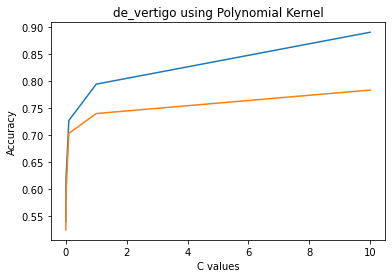

In [14]:
#iterate through all the maps in the data map
results_dict = {}
for map in data_map.keys():
    for degree in range(3,8):
        results_dict[f"{map}-{degree}_polynomial"] = {}
        print(f"testing degree {degree} polynomial kernel")
        poly_training_acc = []
        poly_testing_acc = []

        #get the dataframe linked to the map
        print(f"analyzing: {map}...")
        #data_map[map] = data_map[map].drop(columns = ["map"])
        df_map = data_map[map]

        #extract features, and labels from dataframe
        X = scalar.fit_transform(np.array(df_map)[:, :-1])
        Y = np.array(df_map)[:, -1]

        #split into training and testing data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"Y_train shape: {Y_train.shape}")
        print(f"Y_test shape: {Y_test.shape}")

        #test on diferent values of C
        c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

        for c in c_vals:
            print(f"C = {c}:")
            #initialize and train SVM model
            svm_model = SVC(probability = False, kernel='poly', degree=degree, C=c)
            svm_model.fit(X_train, Y_train)

            #predict on training data
            yhat_train = svm_model.predict(X_train)
            #predict on testing data
            yhat_test = svm_model.predict(X_test)

            #accuracy
            acc_train = np.mean(yhat_train == Y_train)
            print(f"resulting training accuracy: {acc_train}")
            acc_test = np.mean(yhat_test == Y_test)
            print(f"resulting test accuracy: {acc_test}")
            poly_training_acc.append(acc_train)
            poly_testing_acc.append(acc_test)

        results_dict[f"{map}-{degree}_polynomial"]["Training accuracy using Polynomial Kernel"] = poly_training_acc
        results_dict[f"{map}-{degree}_polynomial"]["Testing accuracy using Polynomial Kernel"] = poly_testing_acc

        print(f"{map} analysis complete")
        df = pd.DataFrame(results_dict[f"{map}-{degree}_polynomial"])
        df.to_csv(f"{map}_{degree}-degree_poly.csv")
        plt.plot(c_vals, poly_training_acc)
        plt.plot(c_vals, poly_testing_acc)
        plt.title(f"{map} using Polynomial Kernel")
        plt.xlabel("C values")
        plt.ylabel("Accuracy")
#         plt.savefig(f"{map}_{degree}-degree_poly.png")
        plt.show()

## SVM with Sigmoid Kernel

analyzing: de_dust2...
X_train shape: (14836, 29)
X_test shape: (7308, 29)
Y_train shape: (14836,)
Y_test shape: (7308,)
C = 0.0001:
resulting training accuracy: 0.5411836074413588
resulting test accuracy: 0.5414614121510674
C = 0.001:
resulting training accuracy: 0.714006470746832
resulting test accuracy: 0.7075807334428024
C = 0.01:
resulting training accuracy: 0.7449447290374764
resulting test accuracy: 0.7412424740010947
C = 0.1:
resulting training accuracy: 0.6767322728498247
resulting test accuracy: 0.6778872468527641
C = 1:
resulting training accuracy: 0.6610946346724185
resulting test accuracy: 0.6599616858237548
C = 10:
resulting training accuracy: 0.6662173092477757
resulting test accuracy: 0.6626984126984127
de_dust2 analysis complete


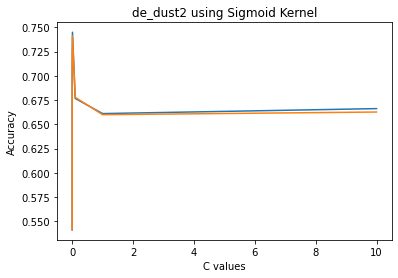

analyzing: de_inferno...
X_train shape: (15953, 29)
X_test shape: (7858, 29)
Y_train shape: (15953,)
Y_test shape: (7858,)
C = 0.0001:
resulting training accuracy: 0.5456653920892622
resulting test accuracy: 0.546703995927717
C = 0.001:
resulting training accuracy: 0.704506989281013
resulting test accuracy: 0.6995418681598371
C = 0.01:
resulting training accuracy: 0.7404876825675422
resulting test accuracy: 0.7347925680834818
C = 0.1:
resulting training accuracy: 0.6741678681125807
resulting test accuracy: 0.6731992873504709
C = 1:
resulting training accuracy: 0.6606280950291481
resulting test accuracy: 0.6600916263680325
C = 10:
resulting training accuracy: 0.6606280950291481
resulting test accuracy: 0.6672181216594554
de_inferno analysis complete


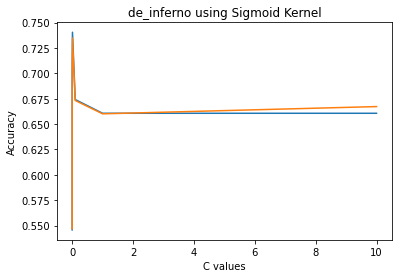

analyzing: de_mirage...
X_train shape: (12445, 29)
X_test shape: (6131, 29)
Y_train shape: (12445,)
Y_test shape: (6131,)
C = 0.0001:
resulting training accuracy: 0.5034953796705505
resulting test accuracy: 0.5163921056923829
C = 0.001:
resulting training accuracy: 0.7247087183607874
resulting test accuracy: 0.724677866579677
C = 0.01:
resulting training accuracy: 0.7478505423865006
resulting test accuracy: 0.7447398466808025
C = 0.1:
resulting training accuracy: 0.6920048212133387
resulting test accuracy: 0.6894470722557494
C = 1:
resulting training accuracy: 0.6749698674166332
resulting test accuracy: 0.6672647202740173
C = 10:
resulting training accuracy: 0.6731217356368019
resulting test accuracy: 0.6656336649812429
de_mirage analysis complete


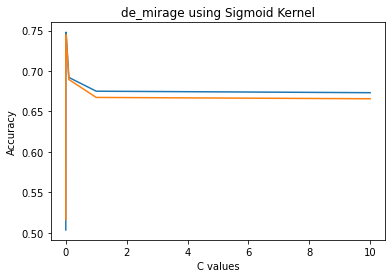

analyzing: de_nuke...
X_train shape: (12746, 29)
X_test shape: (6279, 29)
Y_train shape: (12746,)
Y_test shape: (6279,)
C = 0.0001:
resulting training accuracy: 0.5335791620900675
resulting test accuracy: 0.5435578913839784
C = 0.001:
resulting training accuracy: 0.7296406715832418
resulting test accuracy: 0.7292562509953814
C = 0.01:
resulting training accuracy: 0.7388984779538679
resulting test accuracy: 0.7383341296384774
C = 0.1:
resulting training accuracy: 0.675113761179978
resulting test accuracy: 0.6719222806179328
C = 1:
resulting training accuracy: 0.6591087399968618
resulting test accuracy: 0.6561554387641344
C = 10:
resulting training accuracy: 0.6571473403420681
resulting test accuracy: 0.6528109571587832
de_nuke analysis complete


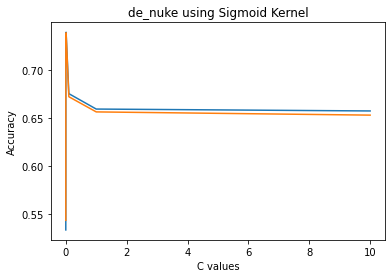

analyzing: de_overpass...
X_train shape: (9434, 29)
X_test shape: (4647, 29)
Y_train shape: (9434,)
Y_test shape: (4647,)
C = 0.0001:
resulting training accuracy: 0.5076319694721221
resulting test accuracy: 0.4876264256509576
C = 0.001:
resulting training accuracy: 0.7180411278354887
resulting test accuracy: 0.718097697439208
C = 0.01:
resulting training accuracy: 0.7536569853720585
resulting test accuracy: 0.755110824187648
C = 0.1:
resulting training accuracy: 0.6905872376510493
resulting test accuracy: 0.7019582526361093
C = 1:
resulting training accuracy: 0.6647233411066356
resulting test accuracy: 0.6686034000430385
C = 10:
resulting training accuracy: 0.6622853508585965
resulting test accuracy: 0.6653755110824188
de_overpass analysis complete


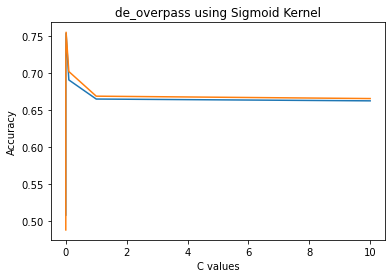

analyzing: de_train...
X_train shape: (9038, 29)
X_test shape: (4453, 29)
Y_train shape: (9038,)
Y_test shape: (4453,)
C = 0.0001:
resulting training accuracy: 0.5422659880504537
resulting test accuracy: 0.5409836065573771
C = 0.001:
resulting training accuracy: 0.6668510732462934
resulting test accuracy: 0.6584325174039973
C = 0.01:
resulting training accuracy: 0.7526001327727373
resulting test accuracy: 0.7496070065124635
C = 0.1:
resulting training accuracy: 0.6898650143837132
resulting test accuracy: 0.6905456995284078
C = 1:
resulting training accuracy: 0.6631998229696836
resulting test accuracy: 0.6662923871547272
C = 10:
resulting training accuracy: 0.6763664527550343
resulting test accuracy: 0.6680889288120369
de_train analysis complete


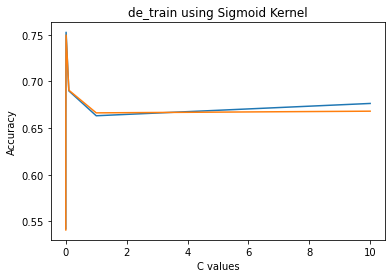

analyzing: de_vertigo...
X_train shape: (7461, 29)
X_test shape: (3676, 29)
Y_train shape: (7461,)
Y_test shape: (3676,)
C = 0.0001:
resulting training accuracy: 0.5341107090202386
resulting test accuracy: 0.5204026115342764
C = 0.001:
resulting training accuracy: 0.6469642139123442
resulting test accuracy: 0.6444504896626768
C = 0.01:
resulting training accuracy: 0.7549926283340035
resulting test accuracy: 0.750544069640914
C = 0.1:
resulting training accuracy: 0.7115668140999866
resulting test accuracy: 0.7102829162132753
C = 1:
resulting training accuracy: 0.6706875753920386
resulting test accuracy: 0.6705658324265505
C = 10:
resulting training accuracy: 0.6663986060849753
resulting test accuracy: 0.6651251360174102
de_vertigo analysis complete


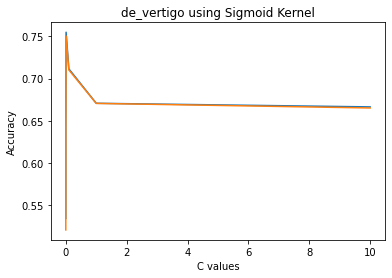

In [13]:
#iterate through all the maps in the data map
for map in data_map.keys():
    sigmoid_training_acc = []
    sigmoid_testing_acc = []
    
    #get the dataframe linked to the map
    print(f"analyzing: {map}...")
    #data_map[map] = data_map[map].drop(columns = ["map"])
    df_map = data_map[map]
    
    #extract features, and labels from dataframe
    X = scalar.fit_transform(np.array(df_map)[:, :-1])
    Y = np.array(df_map)[:, -1]
    
    #split into training and testing data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"Y_test shape: {Y_test.shape}")
    
    #test on diferent values of C
    c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    
    for c in c_vals:
        print(f"C = {c}:")
        #initialize and train SVM model
        svm_model = SVC(probability = False, kernel='sigmoid' , C=c)
        svm_model.fit(X_train, Y_train)

        #predict on training data
        yhat_train = svm_model.predict(X_train)
        #predict on testing data
        yhat_test = svm_model.predict(X_test)

        #accuracy
        acc_train = np.mean(yhat_train == Y_train)
        print(f"resulting training accuracy: {acc_train}")
        acc_test = np.mean(yhat_test == Y_test)
        print(f"resulting test accuracy: {acc_test}")
        sigmoid_training_acc.append(acc_train)
        sigmoid_testing_acc.append(acc_test)
        
    results_dict[map]["Training accuracy using Sigmoid Kernel"] = sigmoid_training_acc
    results_dict[map]["Testing accuracy using Sigmoid Kernel"] = sigmoid_testing_acc
    
    print(f"{map} analysis complete")
    plt.plot(c_vals, sigmoid_training_acc)
    plt.plot(c_vals, sigmoid_testing_acc)
    plt.title(f"{map} using Sigmoid Kernel")
    plt.xlabel("C values")
    plt.ylabel("Accuracy")
#     plt.savefig(f"{map}_sigmoid.png")
    plt.show()

In [14]:
results_df_dict = {
    "C-values" : c_vals,
    "Training accuracy (RBF Kernel)": rbf_training_acc,
    "Testing accuracy (RBF Kernel)" : rbf_testing_acc,
    "Training accuracy (Linear Kernel)": linear_training_acc,
    "Testing accuracy (Linear Kernel)" : linear_testing_acc,
    "Training accuracy (Polynomial Kernel)": poly_training_acc,
    "Testing accuracy (Polynomial Kernel)" : poly_testing_acc,
    "Training accuracy (Sigmoid Kernel)": sigmoid_training_acc,
    "Testing accuracy (Sigmoid Kernel)" : sigmoid_testing_acc,
}

In [15]:
results_df = pd.DataFrame(results_df_dict)
results_df.head()

,C-values,Training accuracy (RBF Kernel),Testing accuracy (RBF Kernel),Training accuracy (Linear Kernel),Testing accuracy (Linear Kernel),Training accuracy (Polynomial Kernel),Testing accuracy (Polynomial Kernel),Training accuracy (Sigmoid Kernel),Testing accuracy (Sigmoid Kernel)
0,0.0001,0.534111,0.520403,0.743466,0.744015,0.534111,0.520403,0.534111,0.520403
1,0.0010,0.534111,0.520403,0.760354,0.757617,0.536925,0.522307,0.646964,0.644450
2,0.0100,0.758075,0.755169,0.759148,0.755441,0.716526,0.715180,0.754993,0.750544
3,0.1000,0.777778,0.773123,0.759684,0.754081,0.773087,0.751360,0.711567,0.710283
4,1.0000,0.819461,0.788629,0.759416,0.753264,0.826565,0.786725,0.670688,0.670566


In [16]:
results_df.to_csv('svm_results.csv')

In [17]:
results_df

,C-values,Training accuracy (RBF Kernel),Testing accuracy (RBF Kernel),Training accuracy (Linear Kernel),Testing accuracy (Linear Kernel),Training accuracy (Polynomial Kernel),Testing accuracy (Polynomial Kernel),Training accuracy (Sigmoid Kernel),Testing accuracy (Sigmoid Kernel)
0,0.0001,0.534111,0.520403,0.743466,0.744015,0.534111,0.520403,0.534111,0.520403
1,0.0010,0.534111,0.520403,0.760354,0.757617,0.536925,0.522307,0.646964,0.644450
2,0.0100,0.758075,0.755169,0.759148,0.755441,0.716526,0.715180,0.754993,0.750544
3,0.1000,0.777778,0.773123,0.759684,0.754081,0.773087,0.751360,0.711567,0.710283
4,1.0000,0.819461,0.788629,0.759416,0.753264,0.826565,0.786725,0.670688,0.670566
5,10.0000,0.885538,0.804679,0.759684,0.753808,0.867176,0.797878,0.666399,0.665125


In [16]:
#simple statistical summary for each feature
df_NW.describe()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
count,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,0.0,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,...,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750,0.490189
std,54.465238,4.790362,4.823543,0.0,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,...,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162,0.499906
min,0.010000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,0.0,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,0.0,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,0.0,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,175.000000,32.000000,33.000000,0.0,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,...,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000,1.000000


In [17]:
#view correlation table between features
df_NW.corr()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
time_left,1.000000,0.000381,-0.003067,NaN,0.684514,0.678952,-0.089950,-0.195579,0.374530,0.341717,...,0.007462,0.108141,0.036235,0.128073,0.004142,0.058112,0.044942,0.010688,0.018366,0.068994
ct_score,0.000381,1.000000,0.626726,NaN,0.016495,-0.010987,0.100518,0.034789,0.249416,0.074700,...,0.051485,0.136987,0.038498,0.152342,0.008133,0.051174,0.062015,-0.011149,-0.004670,0.057304
t_score,-0.003067,0.626726,1.000000,NaN,0.002840,0.001720,0.035370,0.081671,0.069768,0.258855,...,0.118714,0.058564,0.104194,0.049208,0.011222,0.030615,0.144589,0.016507,-0.026379,-0.026863
bomb_planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ct_health,0.684514,0.016495,0.002840,NaN,1.000000,0.756167,0.391429,0.140262,0.306399,0.217013,...,0.248142,0.337015,0.266243,0.299532,-0.019960,0.046761,0.262061,0.046326,0.033921,0.190662
t_health,0.678952,-0.010987,0.001720,NaN,0.756167,1.000000,0.166416,0.325604,0.236764,0.306772,...,0.347057,0.251135,0.341130,0.249609,0.012683,0.016732,0.312744,0.036673,0.046655,-0.091361
ct_armor,-0.089950,0.100518,0.035370,NaN,0.391429,0.166416,1.000000,0.295957,-0.050308,-0.146743,...,0.281213,0.666098,0.290592,0.563742,-0.053678,0.080041,0.292294,0.096492,0.042389,0.336382
t_armor,-0.195579,0.034789,0.081671,NaN,0.140262,0.325604,0.295957,1.000000,-0.168787,-0.064501,...,0.739180,0.269671,0.700143,0.251887,0.040938,-0.068558,0.639853,0.030713,0.083507,-0.290753
ct_money,0.374530,0.249416,0.069768,NaN,0.306399,0.236764,-0.050308,-0.168787,1.000000,0.373822,...,-0.068579,0.100398,-0.045443,0.169594,-0.000720,0.114220,-0.054578,-0.086894,-0.023366,0.129326
t_money,0.341717,0.074700,0.258855,NaN,0.217013,0.306772,-0.146743,-0.064501,0.373822,1.000000,...,0.111240,0.004594,0.105130,-0.012042,0.052548,0.023718,0.176183,-0.003800,-0.102335,-0.098362
